In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df=pd.read_csv('motapa.csv')

In [50]:
df.head()

,Height,Weight,family_history_with_overweight,SCC,MTRANS_Walking,FAVC_z,FCVC_minmax,NCP_z,CAEC_minmax,CH2O_minmax,FAF_minmax,TUE_z,CALC_z,Age_bin_minmax,NObeyesdad
0,1.62,64.0,1,0,0,2.766876,0.5,0.404704,0.333333,0.5,0.000000,0.550985,1.439033,0.25,1
1,1.52,56.0,1,1,0,2.766876,1.0,0.404704,0.333333,1.0,1.000000,1.092724,0.516552,0.25,1
2,1.80,77.0,1,0,0,2.766876,0.5,0.404704,0.333333,0.5,0.666667,0.550985,2.472136,0.50,1
3,1.80,87.0,0,0,1,2.766876,1.0,0.404704,0.333333,0.5,0.666667,1.092724,2.472136,0.75,2
4,1.78,89.8,0,0,0,2.766876,0.5,2.164116,0.333333,0.5,0.000000,1.092724,0.516552,0.50,3


In [51]:
df.iloc[:,[0,1,2]]

,Height,Weight,family_history_with_overweight
0,1.620000,64.000000,1
1,1.520000,56.000000,1
2,1.800000,77.000000,1
3,1.800000,87.000000,0
4,1.780000,89.800000,0
...,...,...,...
2081,1.710730,131.408528,1
2082,1.748584,133.742943,1
2083,1.752206,133.689352,1
2084,1.739450,133.346641,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Height                          2086 non-null   float64
 1   Weight                          2086 non-null   float64
 2   family_history_with_overweight  2086 non-null   int64  
 3   SCC                             2086 non-null   int64  
 4   MTRANS_Walking                  2086 non-null   int64  
 5   FAVC_z                          2086 non-null   float64
 6   FCVC_minmax                     2086 non-null   float64
 7   NCP_z                           2086 non-null   float64
 8   CAEC_minmax                     2086 non-null   float64
 9   CH2O_minmax                     2086 non-null   float64
 10  FAF_minmax                      2086 non-null   float64
 11  TUE_z                           2086 non-null   float64
 12  CALC_z                          20

<Axes: xlabel='Height', ylabel='Density'>

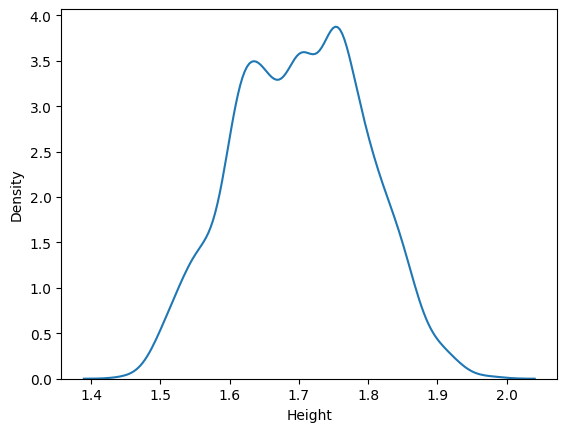

In [54]:
sns.kdeplot(df['Height'])

<Axes: xlabel='Weight', ylabel='Density'>

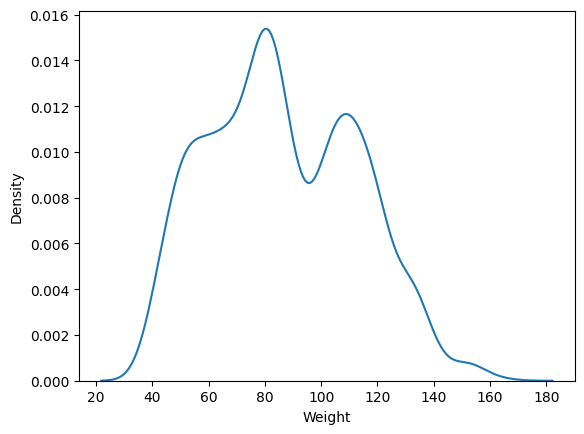

In [55]:
sns.kdeplot(df['Weight'])

<Axes: xlabel='Height', ylabel='Weight'>

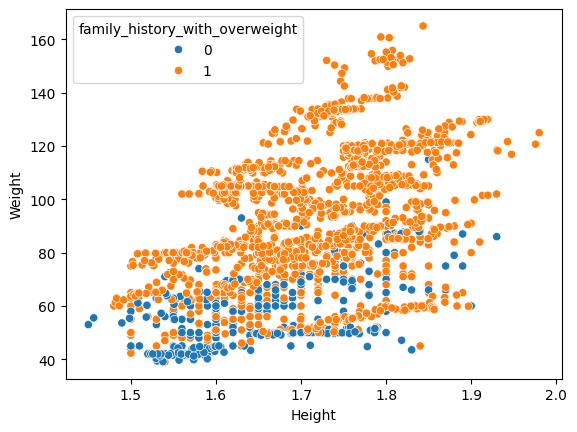

In [60]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(x=df['Height'],y=df['Weight'],hue=df['family_history_with_overweight'])

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df.drop('family_history_with_overweight',axis=1),df['family_history_with_overweight'],test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((1460, 14), (626, 14))

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [67]:
X_train_scaled
X_test_scaled

array([[0.25523342, 0.07064557, 0.        , ..., 0.        , 0.5       ,
        0.16666667],
       [0.61806842, 0.54700442, 0.        , ..., 0.2358581 , 0.        ,
        0.66666667],
       [0.69371761, 0.42860081, 0.        , ..., 0.        , 0.5       ,
        0.5       ],
       ...,
       [0.23613684, 0.11431179, 0.        , ..., 0.        , 0.25      ,
        0.16666667],
       [0.74070283, 0.5564961 , 0.        , ..., 0.2358581 , 0.        ,
        0.66666667],
       [0.21035837, 0.02067777, 0.        , ..., 0.        , 0.25      ,
        0.        ]])

In [69]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [71]:
np.round(X_train_scaled.describe(),1)

,Height,Weight,SCC,MTRANS_Walking,FAVC_z,FCVC_minmax,NCP_z,CAEC_minmax,CH2O_minmax,FAF_minmax,TUE_z,CALC_z,Age_bin_minmax,NObeyesdad
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,0.5,0.4,0.0,0.0,0.1,0.7,0.3,0.4,0.5,0.3,0.4,0.1,0.5,0.5
std,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.2,0.3,0.3,0.2,0.1,0.4,0.3
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.3,0.2,0.0,0.0,0.0,0.5,0.2,0.3,0.3,0.0,0.2,0.0,0.2,0.2
50%,0.5,0.3,0.0,0.0,0.0,0.7,0.2,0.3,0.5,0.3,0.4,0.0,0.5,0.5
75%,0.6,0.5,0.0,0.0,0.0,1.0,0.4,0.3,0.7,0.6,0.5,0.2,0.8,0.8
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


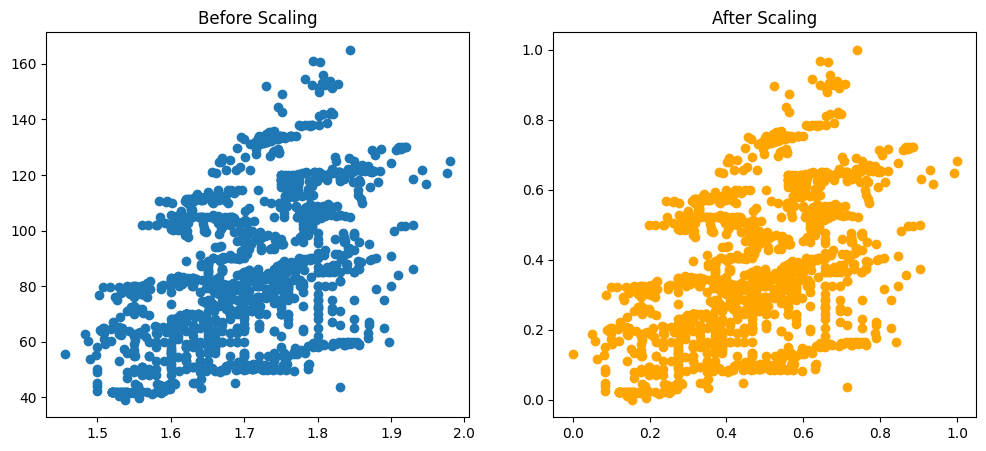

In [77]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x='Height',y='Weight',data=X_train)
ax1.set_title("Before Scaling")
ax2.scatter(x='Height',y='Weight',data=X_train_scaled,color='Orange')
ax2.set_title("After Scaling")
plt.show()

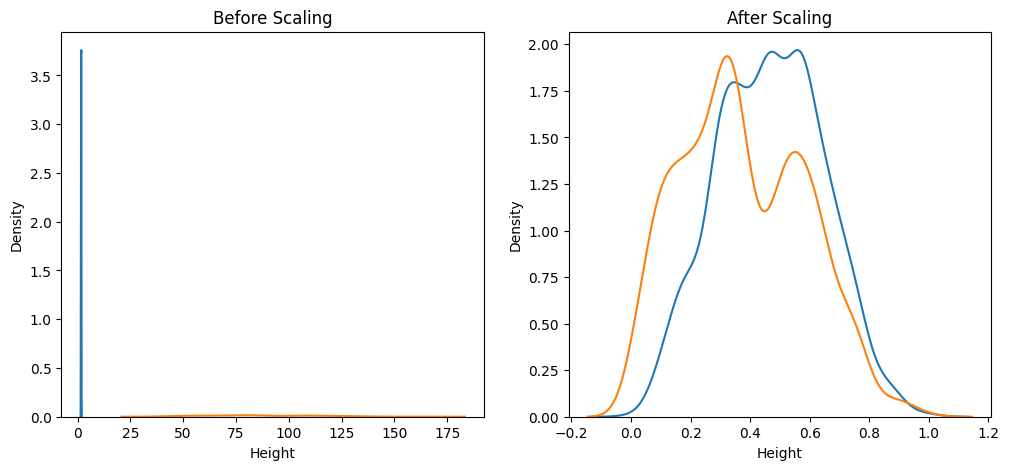

In [82]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(x='Height',data=X_train,ax=ax1)
sns.kdeplot(x='Weight',data=X_train,ax=ax1)
ax1.set_title("Before Scaling")

sns.kdeplot(x='Height',data=X_train_scaled,ax=ax2)
sns.kdeplot(x='Weight',data=X_train_scaled,ax=ax2)
ax2.set_title("After Scaling")

plt.show()